In [1]:
#! -*- coding: UTF8 -*-
import os
os.chdir(os.getcwd())

## Import Module

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [3]:
import matplotlib as mpl
%matplotlib inline
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
sns.set(font='TH Sarabun New')

## Import Data

In [4]:
df = pd.read_excel('process_data/GPP_6210501001_real.xlsx',sheet_name="SingBuri",index_col="Year") #ตัวอย่าง
df.head()

,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply; sewerage, waste management and remediation activities",Construction,Wholesale and retail trade and repair of motor vehicles,Transportation and storage,Accommodation and food service activities,Information and communication,...,การนำเข้าสินค้าและบริการ (คิดเป็น % ของจีดีพี),มูลค่าเพิ่มของอุตสาหกรรม (คิดเป็น % ของจีดีพี),จำนวนประชากรทั้งหมด (คน),ค่าใช้จ่ายในการวิจัยและพัฒนา (คิดเป็น % ของจีดีพี),รายจ่ายของประชากรในจังหวัดสิงห์บุรี (บาท),เนื้อที่ที่ถือครองเพื่อการเกษตร (ไร่),เนื้อที่สวนผักและไม้ดอก (ไร่),เนื้อที่สำหรับปลูกนาข้าว (ไร่),จำนวนโรงงานอุตสาหกรรม (โรงงาน),GPP Per capita (Baht)
Year,,,,,,,,,,,,,,,,,,,,,
1995,1517.167364,42.410974,2247.735336,251.360573,20.751178,540.088489,1553.350483,662.278852,43.742963,80.752569,...,48.223830,37.278020,59467272,0.11918,12384.870133,407634.682481,2134.568256,342336.266980,10,143862.554
1996,2151.732729,39.837997,2525.526291,268.322033,21.818723,412.596415,1778.579003,737.967580,37.939543,90.268175,...,45.255728,37.081286,60130190,0.11918,13039.348373,414866.326298,2150.253635,342215.983314,10,171503.917
1997,2438.909192,28.967616,2434.777758,282.656660,23.104803,399.625836,1934.577471,790.819202,44.211324,89.376423,...,46.814732,36.564600,60846588,0.10214,13222.127602,416885.941624,2154.634165,342182.391127,10,179223.451
1998,2872.227679,23.722862,2635.233786,362.892721,23.570355,241.360017,1787.959114,724.545611,45.740985,87.423898,...,42.303171,36.111727,61585103,0.17525,13255.000370,417249.168605,2155.422002,342176.349586,10,180611.806
1999,1738.973389,18.169377,2775.669860,310.675285,26.850346,240.759815,1607.285461,736.278279,63.183246,98.627151,...,44.267746,36.378900,62298569,0.24836,13473.896446,419667.856278,2160.668116,342136.119643,10,189856.706


## Principal Component Analysis : Scikit-Learn

In [5]:
X = df.drop('GPP Per capita (Baht)',1)
y = df['GPP Per capita (Baht)']

/var/folders/37/ffyx67ps24v157rdzs_y3pkc0000gn/T/ipykernel_5842/3021477077.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df.drop('GPP Per capita (Baht)',1)


In [6]:
# Split data into training and test sets using ratio = 70:30
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)

In [7]:
# First, compute mean and SD 
mean_X_train = X_train.mean()
std_X_train = X_train.std()

In [8]:
# Normalize the input matrix for training data
scaled_X_train = (X_train-mean_X_train)/std_X_train
scaled_X_train

,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply; sewerage, waste management and remediation activities",Construction,Wholesale and retail trade and repair of motor vehicles,Transportation and storage,Accommodation and food service activities,Information and communication,...,มูลค่าเพิ่มของการเกษตร (คิดเป็น % ของจีดีพี),การนำเข้าสินค้าและบริการ (คิดเป็น % ของจีดีพี),มูลค่าเพิ่มของอุตสาหกรรม (คิดเป็น % ของจีดีพี),จำนวนประชากรทั้งหมด (คน),ค่าใช้จ่ายในการวิจัยและพัฒนา (คิดเป็น % ของจีดีพี),รายจ่ายของประชากรในจังหวัดสิงห์บุรี (บาท),เนื้อที่ที่ถือครองเพื่อการเกษตร (ไร่),เนื้อที่สวนผักและไม้ดอก (ไร่),เนื้อที่สำหรับปลูกนาข้าว (ไร่),จำนวนโรงงานอุตสาหกรรม (โรงงาน)
Year,,,,,,,,,,,,,,,,,,,,,
1999,-1.112213,-1.061419,-1.459161,-1.187658,-0.812727,-1.551110,-1.023406,1.695207,-1.506147,-2.031106,...,-0.565718,-1.994533,-0.725911,-1.323263,-0.487482,-1.032942,-1.244240,-1.189027,-0.538193,0.988632
2017,0.285184,0.227897,0.726995,1.060482,2.241668,1.093914,1.853512,2.047924,1.397537,1.059914,...,-1.085901,-0.663574,-1.737192,1.240212,2.613591,1.102151,1.195099,1.515892,1.242978,-1.271099
1995,-1.298644,0.112680,-1.702834,-1.481982,-0.980160,-0.099911,-1.113277,0.262679,-2.420023,-2.519337,...,-0.364491,-1.465393,-0.057403,-2.373429,-1.019179,-1.375439,-1.650863,-1.569954,-0.418879,0.988632
2015,-0.351736,1.185049,0.722411,1.108632,1.967256,0.924025,0.780368,-0.561053,0.600904,0.704112,...,-0.587390,-0.264403,-0.874407,1.056499,1.026073,1.691528,1.178034,1.618057,1.291264,-1.271099
2016,-0.509343,0.477317,0.896680,1.037226,1.414439,1.082599,1.192514,0.573155,0.982040,0.306192,...,-1.009288,-0.759107,-1.314873,1.151748,1.693185,0.824977,1.177088,1.545082,1.314513,1.553565
2004,-0.281872,-1.205081,-0.356134,-0.622964,-0.617252,-0.778126,-0.762926,-0.791195,1.107934,0.440259,...,-0.140113,0.302315,0.406758,-0.323008,-0.528970,-0.423008,-0.520107,-0.510654,-0.750673,0.423700
2013,2.171808,0.761778,0.840921,1.397388,0.003863,1.285043,1.171474,-1.296729,0.041147,0.846477,...,2.031246,0.817415,-0.339516,0.845079,0.308047,1.685678,1.173371,0.280306,1.238208,-0.141233
2008,1.837765,0.863414,0.594534,-0.048007,-0.462968,0.121618,0.498047,0.803914,0.401333,-0.009226,...,0.695164,1.316243,1.579509,0.246595,-0.672905,-0.932899,0.954447,0.870717,-1.183347,-0.706166
2003,-0.614960,-1.219252,-0.506710,-0.891912,-0.712844,-1.218432,-0.985420,-1.540050,-0.125303,0.393491,...,0.020507,-0.536284,0.418560,-0.488226,-0.499912,-0.534870,-0.652913,-0.635068,-0.711704,0.423700


In [9]:
# Compute covariance matrix of normalized input
cov_scaled_X_train = np.cov(scaled_X_train.T)
cov_scaled_X_train.shape

# Notice that original dimension of variables = p = 4
# Hence, covariance matrix has size = pxp = 4x4

(30, 30)

In [10]:
# Compute eigenvalues and eigenvectors of covariance matrix
from numpy.linalg import eig

eig_values, eig_vectors = eig(cov_scaled_X_train)
eig_values.shape

# Results have 4 eigenvalues

(30,)

In [11]:
# Results have 4 correponding eigenvectors

eig_vectors.shape

(30, 30)

In [12]:
# Matching each pair of eigenvalue and eigenvector and store them in eig_pairs
# Sort eig_pairs using eigenvalues from max to min

eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:,i]) for i in range(len(eig_values))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)
eig_pairs

[(17.328489012067052,
  array([ 0.14761621+0.j,  0.15415801+0.j,  0.21708301+0.j,  0.23222951+0.j,
          0.1986792 +0.j,  0.20598612+0.j,  0.23059577+0.j, -0.01094761+0.j,
          0.18962594+0.j,  0.19510344+0.j,  0.20354246+0.j,  0.14147197+0.j,
          0.19570337+0.j,  0.21157784+0.j,  0.08755959+0.j,  0.22137063+0.j,
          0.21989947+0.j,  0.19634428+0.j,  0.18840203+0.j,  0.11083379+0.j,
          0.06165672+0.j,  0.09617011+0.j, -0.0658411 +0.j,  0.23322003+0.j,
          0.19495132+0.j,  0.21623326+0.j,  0.22554681+0.j,  0.22094228+0.j,
          0.18633909+0.j, -0.13172799+0.j])),
 (5.544524057321664,
  array([ 0.24096735+0.j,  0.05008761+0.j,  0.1213225 +0.j,  0.02039815+0.j,
         -0.19278856+0.j, -0.01316076+0.j, -0.04195581+0.j, -0.22888889+0.j,
          0.09800755+0.j,  0.15816874+0.j, -0.13101035+0.j,  0.16430741+0.j,
         -0.16052136+0.j,  0.08841556+0.j,  0.30686981+0.j, -0.07668519+0.j,
         -0.08982592+0.j,  0.01281104+0.j, -0.24328297+0.j,  0.3

In [13]:
# First, obtain mean and variance of input matrix of traning data
# (Later on, mean and SD will be used to normalize input matrix.)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)

In [14]:
# Show mean of input matrix of training data, computed by Scikit-Learn

scaler.mean_

array([3.06222236e+03, 4.00844631e+01, 5.93703483e+03, 5.50022394e+02,
       5.64558773e+01, 5.60696356e+02, 2.22147149e+03, 6.48709753e+02,
       9.52225278e+01, 1.72987758e+02, 8.94755856e+02, 7.96580503e+02,
       1.61073581e+00, 2.57575746e+01, 9.53111324e+02, 2.18151836e+03,
       8.03967323e+02, 6.43466211e+01, 2.57415796e+02, 1.06305638e+02,
       9.42217249e+00, 5.91797705e+01, 3.73552258e+01, 6.58661476e+07,
       3.66797500e-01, 1.67583073e+04, 4.56488534e+05, 2.24213621e+03,
       3.43038929e+05, 8.25000000e+00])

In [15]:
# Show mean of input matrix of training data, computed manually earlier

mean_X_train

Agriculture, forestry and fishing                                      3.062222e+03
Mining and quarrying                                                   4.008446e+01
Manufacturing                                                          5.937035e+03
Electricity, gas, steam and air conditioning supply                    5.500224e+02
Water supply; sewerage, waste management and remediation activities    5.645588e+01
Construction                                                           5.606964e+02
Wholesale and retail trade and repair of motor vehicles                2.221471e+03
Transportation and storage                                             6.487098e+02
Accommodation and food service activities                              9.522253e+01
Information and communication                                          1.729878e+02
Financial and insurance activities                                     8.947559e+02
Real estate activities                                                 7.965

In [16]:
# Show SD of input matrix of training data, computed by Scikit-Learn 

np.sqrt(scaler.var_)

array([1.15196506e+03, 1.99913452e+01, 2.09776662e+03, 1.95129323e+02,
       3.52706940e+01, 1.99713297e+02, 5.81082036e+02, 5.00162261e+01,
       2.05968556e+01, 3.54483523e+01, 3.68648156e+02, 1.41090065e+02,
       1.20421853e+00, 1.30618230e+01, 1.91410682e+02, 1.34078703e+03,
       2.08811991e+02, 3.16315782e+01, 2.97230463e+02, 1.25125684e+01,
       9.05704351e-01, 7.23904230e+00, 1.30225866e+00, 2.61043560e+06,
       2.35242937e-01, 3.07869848e+03, 2.86532177e+04, 6.63409256e+01,
       1.62421404e+03, 1.71391365e+00])

In [17]:
# Show SD of input matrix of training data, computed manually earlier

std_X_train

# SD's computed by Scikit-Learn and by manually have little difference
# This will contribute to the difference in eigenvalues later

Agriculture, forestry and fishing                                      1.189744e+03
Mining and quarrying                                                   2.064697e+01
Manufacturing                                                          2.166564e+03
Electricity, gas, steam and air conditioning supply                    2.015287e+02
Water supply; sewerage, waste management and remediation activities    3.642742e+01
Construction                                                           2.062630e+02
Wholesale and retail trade and repair of motor vehicles                6.001389e+02
Transportation and storage                                             5.165654e+01
Accommodation and food service activities                              2.127234e+01
Information and communication                                          3.661090e+01
Financial and insurance activities                                     3.807382e+02
Real estate activities                                                 1.457

In [18]:
# Normalize input matrix for training data set using mean and SD (by using function transform)
# Then, use the same mean and SD from train to normalize input matrix for test data set

sk_scaled_X_train = scaler.transform(X_train)
sk_scaled_X_test = scaler.transform(X_test)

# Note that: 
# scaler = StandardScaler().fit(X_train)
# sk_scaled_X_train = scaler.transform(X_train)
# are equivalent to:
# scaler = StandardScaler()
# sk_scaled_X_train = scaler.fit_transform(X_train)

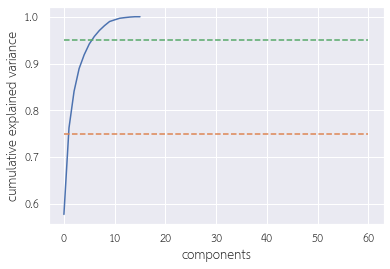

In [19]:
from sklearn.decomposition import PCA
pca = PCA().fit(sk_scaled_X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.plot([0,60], [0.75,0.75], '--')
plt.plot([0,60], [0.95,0.95], '--')
plt.xlabel('components')
plt.ylabel('cumulative explained variance');

#### components = 2

In [20]:
# Select number of principal components and perform PCA
# From manual steps, we know that number of selected principal components should be 2.
# On the other hand, you can perform PCA multiple times with different numbers of principal components
# and check explained_variance_ratio_ afterward to find appropriate number of selected principal components
num_components=2
pca2 = PCA(n_components=num_components)
pca2.fit(sk_scaled_X_train)

PCA(n_components=2)

In [21]:
# Show variances (or eigenvalues) of selected components

pca2.explained_variance_

array([18.48372161,  5.91415899])

In [22]:
# Show principal components (or eigenvectors) of selected components

pca2.components_

array([[-0.14761621, -0.15415801, -0.21708301, -0.23222951, -0.1986792 ,
        -0.20598612, -0.23059577,  0.01094761, -0.18962594, -0.19510344,
        -0.20354246, -0.14147197, -0.19570337, -0.21157784, -0.08755959,
        -0.22137063, -0.21989947, -0.19634428, -0.18840203, -0.11083379,
        -0.06165672, -0.09617011,  0.0658411 , -0.23322003, -0.19495132,
        -0.21623326, -0.22554681, -0.22094228, -0.18633909,  0.13172799],
       [-0.24096735, -0.05008761, -0.1213225 , -0.02039815,  0.19278856,
         0.01316076,  0.04195581,  0.22888889, -0.09800755, -0.15816874,
         0.13101035, -0.16430741,  0.16052136, -0.08841556, -0.30686981,
         0.07668519,  0.08982592, -0.01281104,  0.24328297, -0.35249838,
        -0.28091161, -0.36519144, -0.35753399, -0.04852132,  0.23075595,
         0.03730085, -0.003568  ,  0.04124513,  0.16549262,  0.05005209]])

In [23]:
# Compare results from explained_variance_ and components_ from Scikit-learn
# to eig_paris from manual steps

eig_pairs

[(17.328489012067052,
  array([ 0.14761621+0.j,  0.15415801+0.j,  0.21708301+0.j,  0.23222951+0.j,
          0.1986792 +0.j,  0.20598612+0.j,  0.23059577+0.j, -0.01094761+0.j,
          0.18962594+0.j,  0.19510344+0.j,  0.20354246+0.j,  0.14147197+0.j,
          0.19570337+0.j,  0.21157784+0.j,  0.08755959+0.j,  0.22137063+0.j,
          0.21989947+0.j,  0.19634428+0.j,  0.18840203+0.j,  0.11083379+0.j,
          0.06165672+0.j,  0.09617011+0.j, -0.0658411 +0.j,  0.23322003+0.j,
          0.19495132+0.j,  0.21623326+0.j,  0.22554681+0.j,  0.22094228+0.j,
          0.18633909+0.j, -0.13172799+0.j])),
 (5.544524057321664,
  array([ 0.24096735+0.j,  0.05008761+0.j,  0.1213225 +0.j,  0.02039815+0.j,
         -0.19278856+0.j, -0.01316076+0.j, -0.04195581+0.j, -0.22888889+0.j,
          0.09800755+0.j,  0.15816874+0.j, -0.13101035+0.j,  0.16430741+0.j,
         -0.16052136+0.j,  0.08841556+0.j,  0.30686981+0.j, -0.07668519+0.j,
         -0.08982592+0.j,  0.01281104+0.j, -0.24328297+0.j,  0.3

In [24]:
# Show explained_variance_ratio_  (or percent of transformation along each component)

pca2.explained_variance_ratio_

array([0.5776163 , 0.18481747])

<AxesSubplot:xlabel='PC', ylabel='Variance'>

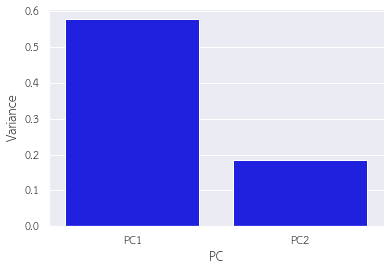

In [25]:
# Plot to see explained_variance_ratio_ using bar graph

temp_df = pd.DataFrame({'Variance':pca2.explained_variance_ratio_,
                        'PC':['PC1','PC2']})
sns.barplot(x='PC',y="Variance", data=temp_df, color="blue")

In [26]:
# Transform input data of original matrix to the new space

sk_X_train_transformed  = pca2.transform(sk_scaled_X_train)

Text(0, 0.5, 'Second Principal Component')

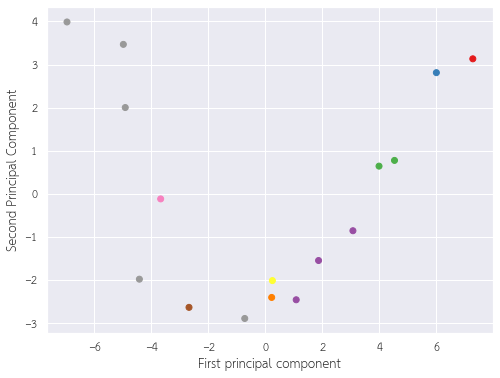

In [27]:
# Plot the new space with the transformed input data

plt.figure(figsize=(8,6))
plt.scatter(sk_X_train_transformed[:,0],sk_X_train_transformed[:,1],c=y_train,cmap='Set1')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [28]:
# The transformed data can also be converted back to the original data
# Since we use new space with lower dimension, 
# the derived X_train will not be the same as the original X_train

sk_derived_X_train = pca2.inverse_transform(sk_X_train_transformed)
sk_derived_X_train - sk_scaled_X_train

array([[-4.14840451e-01,  3.05657664e-02, -1.36551200e-01,
        -2.23829012e-01,  1.90072729e-01,  4.03394553e-01,
        -2.08212137e-01, -1.04107320e+00,  1.42283874e-01,
         4.82316702e-01,  5.31913408e-01, -8.10453917e-01,
         1.09177272e-01,  2.02237795e-01, -4.04580454e-02,
        -1.76741184e-01, -1.81788829e-01,  3.93265583e-02,
         2.28361747e-01, -2.68089602e-02, -5.76022785e-01,
         4.55469081e-01,  1.38620580e-01, -1.68852440e-01,
        -1.66423960e-02, -1.25307965e-01, -7.79474041e-02,
         1.87470528e-02, -9.62480693e-02, -9.00394613e-02],
       [-2.29786768e-01,  6.36141443e-01,  2.73844169e-01,
         4.37201356e-01, -1.65600493e-01,  3.54147511e-01,
        -1.44497432e-01, -1.27826726e+00, -5.16505706e-01,
        -3.69691220e-01,  2.30233299e-01, -4.72394568e-01,
        -9.73465037e-01, -3.73663068e-01, -4.56442360e-01,
         5.73487677e-01,  6.40109030e-02, -4.76881248e-01,
        -4.48441419e-02, -1.63214867e-01,  4.29597582e-

<AxesSubplot:>

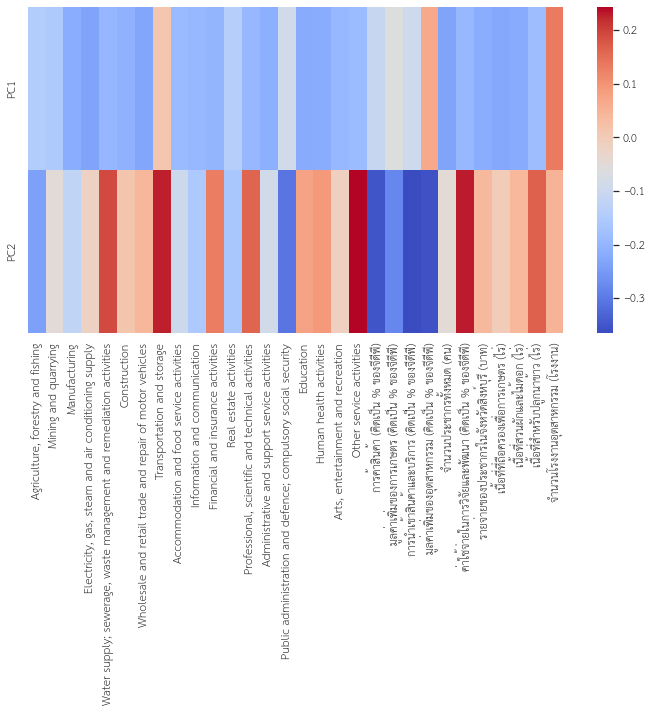

In [29]:
# Plot to see correlation between selected principal components and original variables

temp_df3 = pd.DataFrame(pca2.components_, columns=X.columns)
temp_df3.rename(index={0: "PC1", 1: "PC2"}, inplace=True)

plt.figure(figsize=(12,6))
sns.heatmap(temp_df3,cmap='coolwarm')

# The result shows that principal component 1 correlates with sepal length, petal width, petal length
# Principal component 2 correlates with petal width and petal length

#### components = 3

In [30]:
num_components=3
pca3 = PCA(n_components=num_components)
pca3.fit(sk_scaled_X_train)

PCA(n_components=3)

In [31]:
pca3.explained_variance_

array([18.48372161,  5.91415899,  2.50417552])

In [32]:
pca3.components_

array([[-0.14761621, -0.15415801, -0.21708301, -0.23222951, -0.1986792 ,
        -0.20598612, -0.23059577,  0.01094761, -0.18962594, -0.19510344,
        -0.20354246, -0.14147197, -0.19570337, -0.21157784, -0.08755959,
        -0.22137063, -0.21989947, -0.19634428, -0.18840203, -0.11083379,
        -0.06165672, -0.09617011,  0.0658411 , -0.23322003, -0.19495132,
        -0.21623326, -0.22554681, -0.22094228, -0.18633909,  0.13172799],
       [-0.24096735, -0.05008761, -0.1213225 , -0.02039815,  0.19278856,
         0.01316076,  0.04195581,  0.22888889, -0.09800755, -0.15816874,
         0.13101035, -0.16430741,  0.16052136, -0.08841556, -0.30686981,
         0.07668519,  0.08982592, -0.01281104,  0.24328297, -0.35249838,
        -0.28091161, -0.36519144, -0.35753399, -0.04852132,  0.23075595,
         0.03730085, -0.003568  ,  0.04124513,  0.16549262,  0.05005209],
       [ 0.1899453 ,  0.37297168,  0.08865202,  0.11143548, -0.11628027,
         0.26708337,  0.10279436, -0.1068049 , -0

In [33]:
eig_pairs

[(17.328489012067052,
  array([ 0.14761621+0.j,  0.15415801+0.j,  0.21708301+0.j,  0.23222951+0.j,
          0.1986792 +0.j,  0.20598612+0.j,  0.23059577+0.j, -0.01094761+0.j,
          0.18962594+0.j,  0.19510344+0.j,  0.20354246+0.j,  0.14147197+0.j,
          0.19570337+0.j,  0.21157784+0.j,  0.08755959+0.j,  0.22137063+0.j,
          0.21989947+0.j,  0.19634428+0.j,  0.18840203+0.j,  0.11083379+0.j,
          0.06165672+0.j,  0.09617011+0.j, -0.0658411 +0.j,  0.23322003+0.j,
          0.19495132+0.j,  0.21623326+0.j,  0.22554681+0.j,  0.22094228+0.j,
          0.18633909+0.j, -0.13172799+0.j])),
 (5.544524057321664,
  array([ 0.24096735+0.j,  0.05008761+0.j,  0.1213225 +0.j,  0.02039815+0.j,
         -0.19278856+0.j, -0.01316076+0.j, -0.04195581+0.j, -0.22888889+0.j,
          0.09800755+0.j,  0.15816874+0.j, -0.13101035+0.j,  0.16430741+0.j,
         -0.16052136+0.j,  0.08841556+0.j,  0.30686981+0.j, -0.07668519+0.j,
         -0.08982592+0.j,  0.01281104+0.j, -0.24328297+0.j,  0.3

In [34]:
pca3.explained_variance_ratio_

array([0.5776163 , 0.18481747, 0.07825548])

<AxesSubplot:xlabel='PC', ylabel='Variance'>

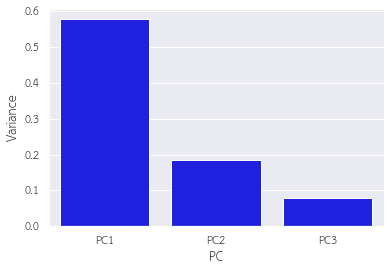

In [35]:
temp_df = pd.DataFrame({'Variance':pca3.explained_variance_ratio_,
                        'PC':['PC1','PC2','PC3']})
sns.barplot(x='PC',y="Variance", data=temp_df, color="blue")

In [36]:
sk_X_train_transformed  = pca3.transform(sk_scaled_X_train)

Text(0, 0.5, 'Second Principal Component')

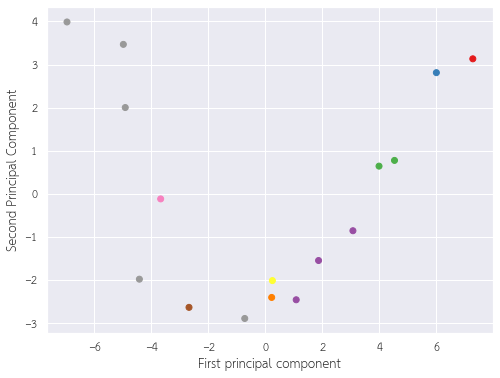

In [37]:
plt.figure(figsize=(8,6))
plt.scatter(sk_X_train_transformed[:,0],sk_X_train_transformed[:,1],c=y_train,cmap='Set1')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [38]:
sk_derived_X_train = pca3.inverse_transform(sk_X_train_transformed)
sk_derived_X_train - sk_scaled_X_train

array([[-4.15072671e-01,  3.01097866e-02, -1.36659582e-01,
        -2.23965248e-01,  1.90214889e-01,  4.03068028e-01,
        -2.08337809e-01, -1.04094262e+00,  1.42665405e-01,
         4.82573366e-01,  5.31705139e-01, -8.10105096e-01,
         1.09387700e-01,  2.02265693e-01, -4.00758800e-02,
        -1.76933115e-01, -1.81647497e-01,  3.95980948e-02,
         2.28481114e-01, -2.66583190e-02, -5.76449174e-01,
         4.55475380e-01,  1.38561493e-01, -1.68759704e-01,
        -1.65103487e-02, -1.25395435e-01, -7.80166300e-02,
         1.88011319e-02, -9.64713692e-02, -8.98630118e-02],
       [-5.55117211e-01, -2.66900546e-03,  1.22004660e-01,
         2.46339282e-01,  3.35595330e-02, -1.03301831e-01,
        -3.20559351e-01, -1.09533625e+00,  1.80056626e-02,
        -1.01146543e-02, -6.15430766e-02,  1.62896783e-02,
        -6.78663905e-01, -3.34579982e-01,  7.89569091e-02,
         3.04600341e-01,  2.62011616e-01, -9.64688885e-02,
         1.22384763e-01,  4.78277827e-02, -1.67757134e-

<AxesSubplot:>

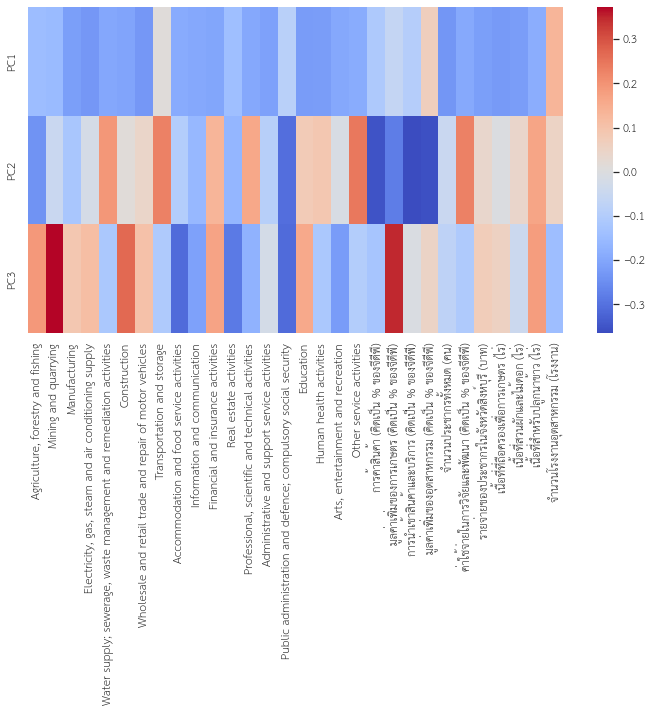

In [39]:
temp_df3 = pd.DataFrame(pca3.components_, columns=X.columns)
temp_df3.rename(index={0: "PC1", 1: "PC2", 2:"PC3"}, inplace=True)

plt.figure(figsize=(12,6))
sns.heatmap(temp_df3,cmap='coolwarm')

#### components = 4

In [40]:
num_components=4
pca4 = PCA(n_components=num_components)
pca4.fit(sk_scaled_X_train)

PCA(n_components=4)

In [41]:
pca4.explained_variance_

array([18.48372161,  5.91415899,  2.50417552,  1.55859   ])

In [42]:
pca4.components_

array([[-0.14761621, -0.15415801, -0.21708301, -0.23222951, -0.1986792 ,
        -0.20598612, -0.23059577,  0.01094761, -0.18962594, -0.19510344,
        -0.20354246, -0.14147197, -0.19570337, -0.21157784, -0.08755959,
        -0.22137063, -0.21989947, -0.19634428, -0.18840203, -0.11083379,
        -0.06165672, -0.09617011,  0.0658411 , -0.23322003, -0.19495132,
        -0.21623326, -0.22554681, -0.22094228, -0.18633909,  0.13172799],
       [-0.24096735, -0.05008761, -0.1213225 , -0.02039815,  0.19278856,
         0.01316076,  0.04195581,  0.22888889, -0.09800755, -0.15816874,
         0.13101035, -0.16430741,  0.16052136, -0.08841556, -0.30686981,
         0.07668519,  0.08982592, -0.01281104,  0.24328297, -0.35249838,
        -0.28091161, -0.36519144, -0.35753399, -0.04852132,  0.23075595,
         0.03730085, -0.003568  ,  0.04124513,  0.16549262,  0.05005209],
       [ 0.1899453 ,  0.37297168,  0.08865202,  0.11143548, -0.11628027,
         0.26708337,  0.10279436, -0.1068049 , -0

In [43]:
eig_pairs

[(17.328489012067052,
  array([ 0.14761621+0.j,  0.15415801+0.j,  0.21708301+0.j,  0.23222951+0.j,
          0.1986792 +0.j,  0.20598612+0.j,  0.23059577+0.j, -0.01094761+0.j,
          0.18962594+0.j,  0.19510344+0.j,  0.20354246+0.j,  0.14147197+0.j,
          0.19570337+0.j,  0.21157784+0.j,  0.08755959+0.j,  0.22137063+0.j,
          0.21989947+0.j,  0.19634428+0.j,  0.18840203+0.j,  0.11083379+0.j,
          0.06165672+0.j,  0.09617011+0.j, -0.0658411 +0.j,  0.23322003+0.j,
          0.19495132+0.j,  0.21623326+0.j,  0.22554681+0.j,  0.22094228+0.j,
          0.18633909+0.j, -0.13172799+0.j])),
 (5.544524057321664,
  array([ 0.24096735+0.j,  0.05008761+0.j,  0.1213225 +0.j,  0.02039815+0.j,
         -0.19278856+0.j, -0.01316076+0.j, -0.04195581+0.j, -0.22888889+0.j,
          0.09800755+0.j,  0.15816874+0.j, -0.13101035+0.j,  0.16430741+0.j,
         -0.16052136+0.j,  0.08841556+0.j,  0.30686981+0.j, -0.07668519+0.j,
         -0.08982592+0.j,  0.01281104+0.j, -0.24328297+0.j,  0.3

In [44]:
pca4.explained_variance_ratio_

array([0.5776163 , 0.18481747, 0.07825548, 0.04870594])

<AxesSubplot:xlabel='PC', ylabel='Variance'>

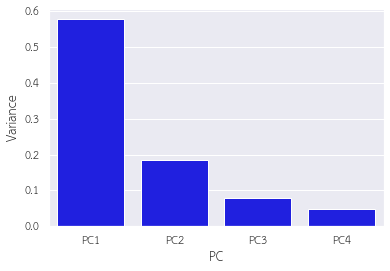

In [45]:
temp_df = pd.DataFrame({'Variance':pca4.explained_variance_ratio_,
                        'PC':['PC1','PC2','PC3','PC4']})
sns.barplot(x='PC',y="Variance", data=temp_df, color="blue")

In [46]:
sk_X_train_transformed  = pca4.transform(sk_scaled_X_train)

Text(0, 0.5, 'Second Principal Component')

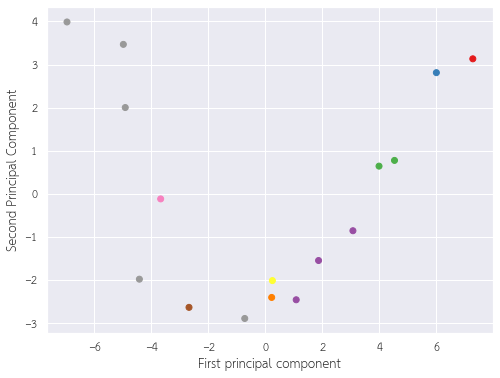

In [47]:
plt.figure(figsize=(8,6))
plt.scatter(sk_X_train_transformed[:,0],sk_X_train_transformed[:,1],c=y_train,cmap='Set1')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [48]:
sk_derived_X_train = pca4.inverse_transform(sk_X_train_transformed)
sk_derived_X_train - sk_scaled_X_train

array([[-3.68540770e-01,  1.38449596e-01, -1.32065428e-01,
        -2.52998356e-01,  2.01462318e-01,  4.41789271e-01,
        -1.66299395e-01, -8.23734523e-01,  1.51462795e-01,
         4.16315160e-01,  5.75444329e-01, -7.84772543e-01,
         1.11564794e-01,  2.91812458e-01, -6.44892918e-02,
        -2.39896158e-01, -1.96192446e-01,  1.82199534e-02,
         2.54325780e-01, -1.74586784e-02, -6.45082951e-01,
         4.62448820e-01,  2.51244483e-01, -1.78460824e-01,
        -2.75143405e-02, -2.31712279e-01, -5.12961070e-02,
         8.59260786e-02, -2.10115795e-01, -9.23478449e-02],
       [-4.11223219e-01,  3.32358092e-01,  1.36211497e-01,
         1.56558084e-01,  6.83407786e-02,  1.64386913e-02,
        -1.90560895e-01, -4.23647799e-01,  4.52104725e-02,
        -2.15009738e-01,  7.37148123e-02,  9.46273817e-02,
        -6.71931520e-01, -5.76679867e-02,  3.46153459e-03,
         1.09895126e-01,  2.17033210e-01, -1.62578075e-01,
         2.02306111e-01,  7.62765024e-02, -3.79998371e-

<AxesSubplot:>

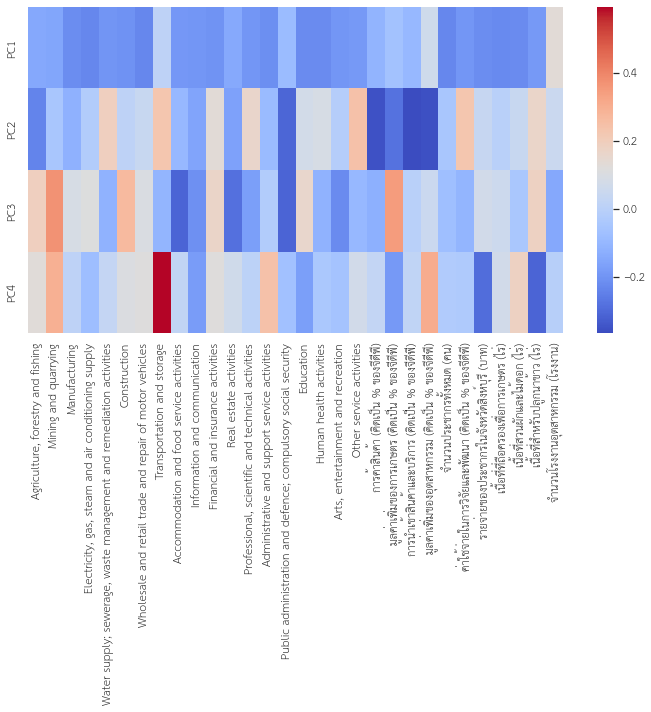

In [49]:
temp_df3 = pd.DataFrame(pca4.components_, columns=X.columns)
temp_df3.rename(index={0: "PC1", 1: "PC2", 2:"PC3", 3:"PC4"}, inplace=True)

plt.figure(figsize=(12,6))
sns.heatmap(temp_df3,cmap='coolwarm')

#### components = 5

In [50]:
num_components=5
pca5 = PCA(n_components=num_components)
pca5.fit(sk_scaled_X_train)

PCA(n_components=5)

In [51]:
pca5.explained_variance_

array([18.48372161,  5.91415899,  2.50417552,  1.55859   ,  0.94497378])

In [52]:
pca5.components_

array([[-0.14761621, -0.15415801, -0.21708301, -0.23222951, -0.1986792 ,
        -0.20598612, -0.23059577,  0.01094761, -0.18962594, -0.19510344,
        -0.20354246, -0.14147197, -0.19570337, -0.21157784, -0.08755959,
        -0.22137063, -0.21989947, -0.19634428, -0.18840203, -0.11083379,
        -0.06165672, -0.09617011,  0.0658411 , -0.23322003, -0.19495132,
        -0.21623326, -0.22554681, -0.22094228, -0.18633909,  0.13172799],
       [-0.24096735, -0.05008761, -0.1213225 , -0.02039815,  0.19278856,
         0.01316076,  0.04195581,  0.22888889, -0.09800755, -0.15816874,
         0.13101035, -0.16430741,  0.16052136, -0.08841556, -0.30686981,
         0.07668519,  0.08982592, -0.01281104,  0.24328297, -0.35249838,
        -0.28091161, -0.36519144, -0.35753399, -0.04852132,  0.23075595,
         0.03730085, -0.003568  ,  0.04124513,  0.16549262,  0.05005209],
       [ 0.1899453 ,  0.37297168,  0.08865202,  0.11143548, -0.11628027,
         0.26708337,  0.10279436, -0.1068049 , -0

In [53]:
eig_pairs

[(17.328489012067052,
  array([ 0.14761621+0.j,  0.15415801+0.j,  0.21708301+0.j,  0.23222951+0.j,
          0.1986792 +0.j,  0.20598612+0.j,  0.23059577+0.j, -0.01094761+0.j,
          0.18962594+0.j,  0.19510344+0.j,  0.20354246+0.j,  0.14147197+0.j,
          0.19570337+0.j,  0.21157784+0.j,  0.08755959+0.j,  0.22137063+0.j,
          0.21989947+0.j,  0.19634428+0.j,  0.18840203+0.j,  0.11083379+0.j,
          0.06165672+0.j,  0.09617011+0.j, -0.0658411 +0.j,  0.23322003+0.j,
          0.19495132+0.j,  0.21623326+0.j,  0.22554681+0.j,  0.22094228+0.j,
          0.18633909+0.j, -0.13172799+0.j])),
 (5.544524057321664,
  array([ 0.24096735+0.j,  0.05008761+0.j,  0.1213225 +0.j,  0.02039815+0.j,
         -0.19278856+0.j, -0.01316076+0.j, -0.04195581+0.j, -0.22888889+0.j,
          0.09800755+0.j,  0.15816874+0.j, -0.13101035+0.j,  0.16430741+0.j,
         -0.16052136+0.j,  0.08841556+0.j,  0.30686981+0.j, -0.07668519+0.j,
         -0.08982592+0.j,  0.01281104+0.j, -0.24328297+0.j,  0.3

In [54]:
pca5.explained_variance_ratio_

array([0.5776163 , 0.18481747, 0.07825548, 0.04870594, 0.02953043])

<AxesSubplot:xlabel='PC', ylabel='Variance'>

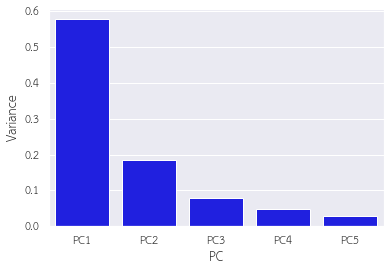

In [55]:
temp_df = pd.DataFrame({'Variance':pca5.explained_variance_ratio_,
                        'PC':['PC1','PC2','PC3','PC4','PC5']})
sns.barplot(x='PC',y="Variance", data=temp_df, color="blue")

In [56]:
sk_X_train_transformed  = pca5.transform(sk_scaled_X_train)

Text(0, 0.5, 'Second Principal Component')

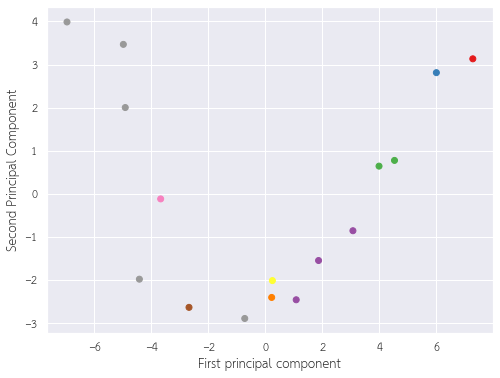

In [57]:
plt.figure(figsize=(8,6))
plt.scatter(sk_X_train_transformed[:,0],sk_X_train_transformed[:,1],c=y_train,cmap='Set1')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [58]:
sk_derived_X_train = pca5.inverse_transform(sk_X_train_transformed)
sk_derived_X_train - sk_scaled_X_train

array([[-3.17254927e-01,  1.04576200e-01, -1.76004322e-01,
        -2.45732640e-01,  2.11056181e-01,  4.01320054e-01,
        -1.67066485e-01, -8.05010091e-01,  1.46927610e-01,
         4.26188462e-01,  5.49143163e-01, -7.70502332e-01,
         9.22527005e-02,  2.45031981e-01, -1.05842165e-01,
        -2.23952065e-01, -1.52351973e-01, -8.19397945e-03,
         2.25540138e-01,  4.15155277e-03, -6.92968213e-01,
         4.64431907e-01,  2.34684606e-01, -1.63112301e-01,
        -2.96163624e-02, -2.42071905e-01, -5.71088245e-05,
         6.30628587e-02, -2.34043745e-01, -2.86838094e-01],
       [-2.79233518e-01,  2.45181220e-01,  2.31299711e-02,
         1.75257197e-01,  9.30316309e-02, -8.77132427e-02,
        -1.92535084e-01, -3.75458433e-01,  3.35386808e-02,
        -1.89599720e-01,  6.02589799e-03,  1.31353322e-01,
        -7.21633294e-01, -1.78062637e-01, -1.02964586e-01,
         1.50928987e-01,  3.29861439e-01, -2.30557207e-01,
         1.28223125e-01,  1.31892785e-01, -5.03236306e-

<AxesSubplot:>

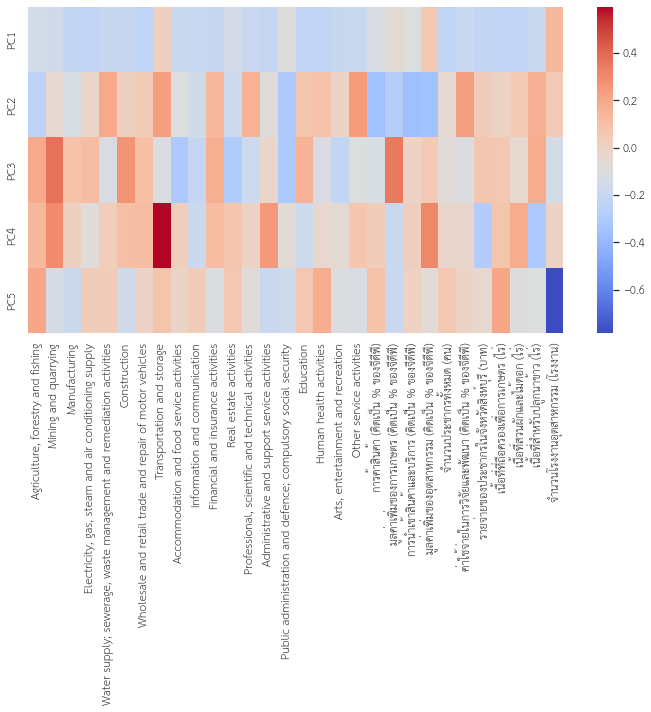

In [59]:
temp_df3 = pd.DataFrame(pca5.components_, columns=X.columns)
temp_df3.rename(index={0: "PC1", 1: "PC2", 2:"PC3", 3:"PC4", 4:"PC5"}, inplace=True)

plt.figure(figsize=(12,6))
sns.heatmap(temp_df3,cmap='coolwarm')

#### components = 6

In [60]:
num_components=6
pca6 = PCA(n_components=num_components)
pca6.fit(sk_scaled_X_train)

PCA(n_components=6)

In [61]:
pca6.explained_variance_

array([18.48372161,  5.91415899,  2.50417552,  1.55859   ,  0.94497378,
        0.73351877])

In [62]:
pca6.components_

array([[-0.14761621, -0.15415801, -0.21708301, -0.23222951, -0.1986792 ,
        -0.20598612, -0.23059577,  0.01094761, -0.18962594, -0.19510344,
        -0.20354246, -0.14147197, -0.19570337, -0.21157784, -0.08755959,
        -0.22137063, -0.21989947, -0.19634428, -0.18840203, -0.11083379,
        -0.06165672, -0.09617011,  0.0658411 , -0.23322003, -0.19495132,
        -0.21623326, -0.22554681, -0.22094228, -0.18633909,  0.13172799],
       [-0.24096735, -0.05008761, -0.1213225 , -0.02039815,  0.19278856,
         0.01316076,  0.04195581,  0.22888889, -0.09800755, -0.15816874,
         0.13101035, -0.16430741,  0.16052136, -0.08841556, -0.30686981,
         0.07668519,  0.08982592, -0.01281104,  0.24328297, -0.35249838,
        -0.28091161, -0.36519144, -0.35753399, -0.04852132,  0.23075595,
         0.03730085, -0.003568  ,  0.04124513,  0.16549262,  0.05005209],
       [ 0.1899453 ,  0.37297168,  0.08865202,  0.11143548, -0.11628027,
         0.26708337,  0.10279436, -0.1068049 , -0

In [63]:
eig_pairs

[(17.328489012067052,
  array([ 0.14761621+0.j,  0.15415801+0.j,  0.21708301+0.j,  0.23222951+0.j,
          0.1986792 +0.j,  0.20598612+0.j,  0.23059577+0.j, -0.01094761+0.j,
          0.18962594+0.j,  0.19510344+0.j,  0.20354246+0.j,  0.14147197+0.j,
          0.19570337+0.j,  0.21157784+0.j,  0.08755959+0.j,  0.22137063+0.j,
          0.21989947+0.j,  0.19634428+0.j,  0.18840203+0.j,  0.11083379+0.j,
          0.06165672+0.j,  0.09617011+0.j, -0.0658411 +0.j,  0.23322003+0.j,
          0.19495132+0.j,  0.21623326+0.j,  0.22554681+0.j,  0.22094228+0.j,
          0.18633909+0.j, -0.13172799+0.j])),
 (5.544524057321664,
  array([ 0.24096735+0.j,  0.05008761+0.j,  0.1213225 +0.j,  0.02039815+0.j,
         -0.19278856+0.j, -0.01316076+0.j, -0.04195581+0.j, -0.22888889+0.j,
          0.09800755+0.j,  0.15816874+0.j, -0.13101035+0.j,  0.16430741+0.j,
         -0.16052136+0.j,  0.08841556+0.j,  0.30686981+0.j, -0.07668519+0.j,
         -0.08982592+0.j,  0.01281104+0.j, -0.24328297+0.j,  0.3

In [64]:
pca6.explained_variance_ratio_

array([0.5776163 , 0.18481747, 0.07825548, 0.04870594, 0.02953043,
       0.02292246])

<AxesSubplot:xlabel='PC', ylabel='Variance'>

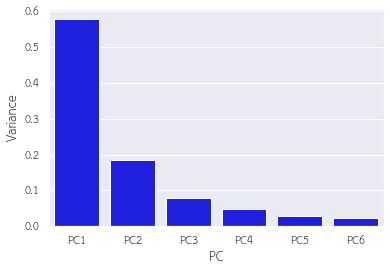

In [65]:
temp_df = pd.DataFrame({'Variance':pca6.explained_variance_ratio_,
                        'PC':['PC1','PC2','PC3','PC4','PC5','PC6']})
sns.barplot(x='PC',y="Variance", data=temp_df, color="blue")

In [66]:
sk_X_train_transformed  = pca6.transform(sk_scaled_X_train)

Text(0, 0.5, 'Second Principal Component')

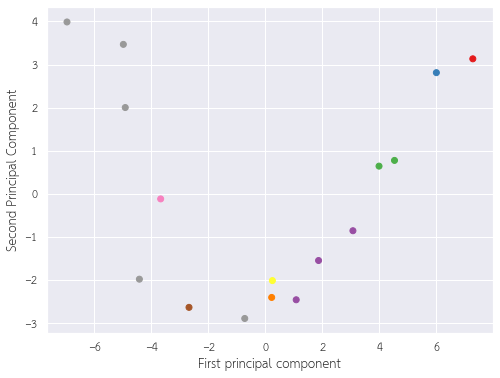

In [67]:
plt.figure(figsize=(8,6))
plt.scatter(sk_X_train_transformed[:,0],sk_X_train_transformed[:,1],c=y_train,cmap='Set1')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [68]:
sk_derived_X_train = pca6.inverse_transform(sk_X_train_transformed)
sk_derived_X_train - sk_scaled_X_train

array([[ 2.15551748e-01, -8.77422711e-02, -1.57107500e-01,
        -2.30017208e-01, -1.43751787e-01,  2.84835559e-01,
         1.74041801e-02, -3.63452468e-01, -8.72894392e-02,
         3.26051637e-01,  1.81841569e-01, -1.68527836e-02,
         2.95853264e-01,  1.38641083e-01, -9.41520741e-02,
        -1.24191014e-01,  5.91572072e-02, -4.14371525e-01,
         1.15245327e-01, -5.95384617e-02, -2.27622738e-01,
         1.65421030e-01, -1.02522659e-01, -7.89602178e-02,
         6.28105201e-02, -1.70574767e-01,  1.07548510e-01,
         8.75813657e-03, -1.48771991e-01,  9.76573246e-02],
       [-1.91397340e-01,  2.13476438e-01,  2.62452186e-02,
         1.77847974e-01,  3.45395412e-02, -1.06916367e-01,
        -1.62124057e-01, -3.02665174e-01, -5.07331743e-03,
        -2.06107839e-01, -5.45258361e-02,  2.55596689e-01,
        -6.88068596e-01, -1.95601775e-01, -1.01037409e-01,
         1.67375158e-01,  3.64729917e-01, -2.97517860e-01,
         1.10040405e-01,  1.21393128e-01, -4.26521486e-

<AxesSubplot:>

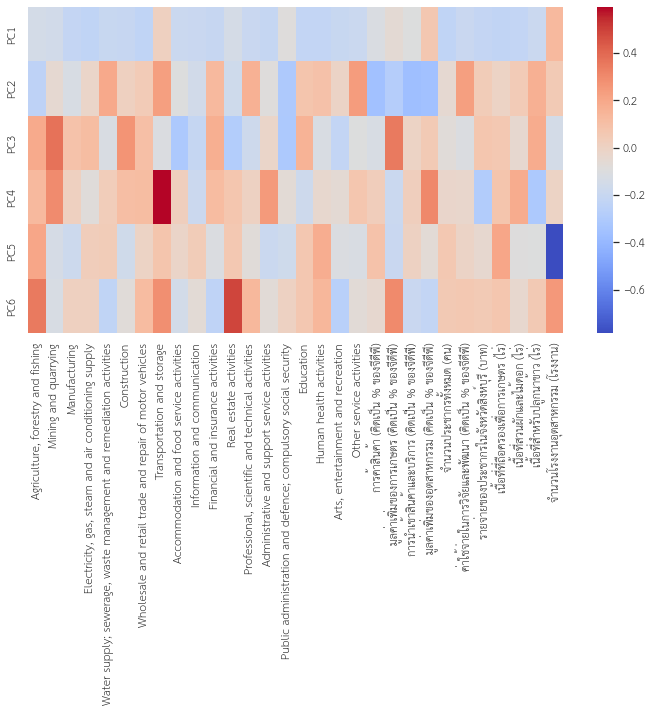

In [69]:
temp_df3 = pd.DataFrame(pca6.components_, columns=X.columns)
temp_df3.rename(index={0: "PC1", 1: "PC2", 2:"PC3", 3:"PC4", 4:"PC5", 5:"PC6"}, inplace=True)

plt.figure(figsize=(12,6))
sns.heatmap(temp_df3,cmap='coolwarm')

#### components = 7

In [70]:
num_components=7
pca7 = PCA(n_components=num_components)
pca7.fit(sk_scaled_X_train)

PCA(n_components=7)

In [71]:
pca7.explained_variance_

array([18.48372161,  5.91415899,  2.50417552,  1.55859   ,  0.94497378,
        0.73351877,  0.51592155])

In [72]:
pca7.components_

array([[-0.14761621, -0.15415801, -0.21708301, -0.23222951, -0.1986792 ,
        -0.20598612, -0.23059577,  0.01094761, -0.18962594, -0.19510344,
        -0.20354246, -0.14147197, -0.19570337, -0.21157784, -0.08755959,
        -0.22137063, -0.21989947, -0.19634428, -0.18840203, -0.11083379,
        -0.06165672, -0.09617011,  0.0658411 , -0.23322003, -0.19495132,
        -0.21623326, -0.22554681, -0.22094228, -0.18633909,  0.13172799],
       [-0.24096735, -0.05008761, -0.1213225 , -0.02039815,  0.19278856,
         0.01316076,  0.04195581,  0.22888889, -0.09800755, -0.15816874,
         0.13101035, -0.16430741,  0.16052136, -0.08841556, -0.30686981,
         0.07668519,  0.08982592, -0.01281104,  0.24328297, -0.35249838,
        -0.28091161, -0.36519144, -0.35753399, -0.04852132,  0.23075595,
         0.03730085, -0.003568  ,  0.04124513,  0.16549262,  0.05005209],
       [ 0.1899453 ,  0.37297168,  0.08865202,  0.11143548, -0.11628027,
         0.26708337,  0.10279436, -0.1068049 , -0

In [73]:
pca7.explained_variance_ratio_

array([0.5776163 , 0.18481747, 0.07825548, 0.04870594, 0.02953043,
       0.02292246, 0.01612255])

<AxesSubplot:xlabel='PC', ylabel='Variance'>

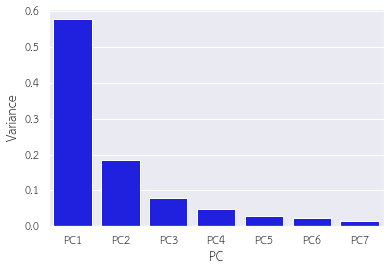

In [74]:
temp_df = pd.DataFrame({'Variance':pca7.explained_variance_ratio_,
                        'PC':['PC1','PC2','PC3','PC4','PC5','PC6','PC7']})
sns.barplot(x='PC',y="Variance", data=temp_df, color="blue")

In [75]:
sk_X_train_transformed  = pca7.transform(sk_scaled_X_train)

Text(0, 0.5, 'Second Principal Component')

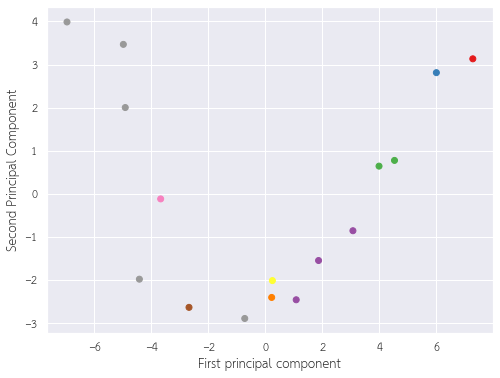

In [76]:
plt.figure(figsize=(8,6))
plt.scatter(sk_X_train_transformed[:,0],sk_X_train_transformed[:,1],c=y_train,cmap='Set1')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [77]:
sk_derived_X_train = pca7.inverse_transform(sk_X_train_transformed)
sk_derived_X_train - sk_scaled_X_train

array([[ 2.13598884e-01, -5.88577793e-02, -1.87039517e-01,
        -2.14217072e-01, -1.32573898e-01,  3.05720826e-01,
         1.20818013e-02, -3.79564657e-01, -1.10609492e-01,
         3.14964796e-01,  2.06442170e-01,  4.21980376e-02,
         2.60011479e-01,  1.09626837e-01, -6.31118022e-02,
        -1.17401138e-01,  5.62374019e-02, -3.95651631e-01,
         1.17465964e-01, -7.87077468e-02, -2.59611438e-01,
         1.46720970e-01, -8.71166158e-02, -7.93301304e-02,
         5.10240921e-02, -1.49134312e-01,  1.16801856e-01,
        -6.78688842e-03, -1.55297095e-01,  1.04359430e-01],
       [-1.81556465e-01,  6.79216043e-02,  1.77078749e-01,
         9.82278679e-02, -2.17881200e-02, -2.12161478e-01,
        -1.35303507e-01, -2.21472576e-01,  1.12441175e-01,
        -1.50238991e-01, -1.78493271e-01, -4.19724189e-02,
        -5.07454545e-01, -4.93930843e-02, -2.57455658e-01,
         1.33159590e-01,  3.79443411e-01, -3.91851216e-01,
         9.88501644e-02,  2.17991058e-01, -2.65323917e-

<AxesSubplot:>

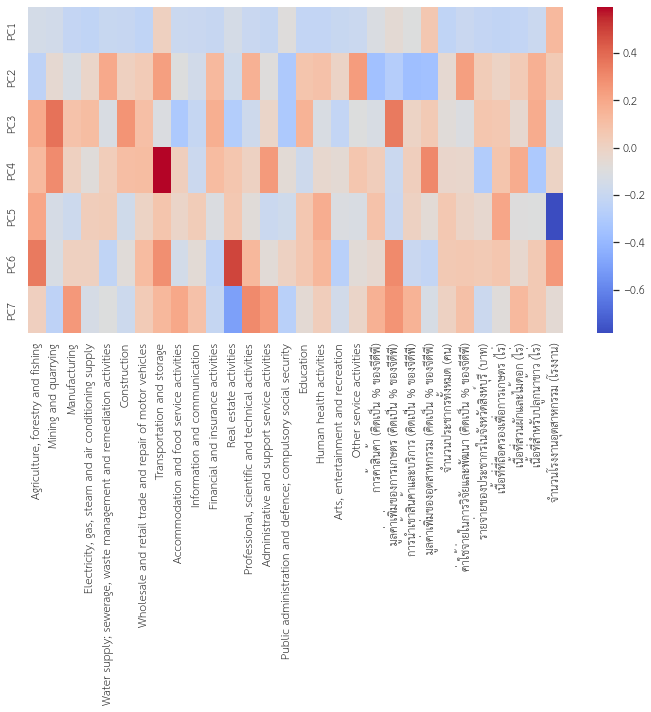

In [78]:
temp_df3 = pd.DataFrame(pca7.components_, columns=X.columns)
temp_df3.rename(index={0: "PC1", 1: "PC2", 2:"PC3", 3:"PC4", 4:"PC5", 5:"PC6", 6:"PC7"}, inplace=True)

plt.figure(figsize=(12,6))
sns.heatmap(temp_df3,cmap='coolwarm')

#### components = 8

In [79]:
num_components=8
pca8 = PCA(n_components=num_components)
pca8.fit(sk_scaled_X_train)

PCA(n_components=8)

In [80]:
pca8.explained_variance_

array([18.48372161,  5.91415899,  2.50417552,  1.55859   ,  0.94497378,
        0.73351877,  0.51592155,  0.409701  ])

In [81]:
pca8.components_

array([[-1.47616209e-01, -1.54158012e-01, -2.17083013e-01,
        -2.32229510e-01, -1.98679197e-01, -2.05986118e-01,
        -2.30595768e-01,  1.09476118e-02, -1.89625941e-01,
        -1.95103437e-01, -2.03542458e-01, -1.41471969e-01,
        -1.95703374e-01, -2.11577843e-01, -8.75595859e-02,
        -2.21370628e-01, -2.19899468e-01, -1.96344283e-01,
        -1.88402030e-01, -1.10833788e-01, -6.16567184e-02,
        -9.61701060e-02,  6.58410954e-02, -2.33220032e-01,
        -1.94951320e-01, -2.16233262e-01, -2.25546806e-01,
        -2.20942277e-01, -1.86339086e-01,  1.31727991e-01],
       [-2.40967349e-01, -5.00876094e-02, -1.21322505e-01,
        -2.03981547e-02,  1.92788557e-01,  1.31607622e-02,
         4.19558143e-02,  2.28888889e-01, -9.80075505e-02,
        -1.58168738e-01,  1.31010345e-01, -1.64307412e-01,
         1.60521363e-01, -8.84155642e-02, -3.06869807e-01,
         7.66851869e-02,  8.98259155e-02, -1.28110399e-02,
         2.43282974e-01, -3.52498380e-01, -2.80911613e-

In [82]:
pca8.explained_variance_ratio_

array([0.5776163 , 0.18481747, 0.07825548, 0.04870594, 0.02953043,
       0.02292246, 0.01612255, 0.01280316])

<AxesSubplot:xlabel='PC', ylabel='Variance'>

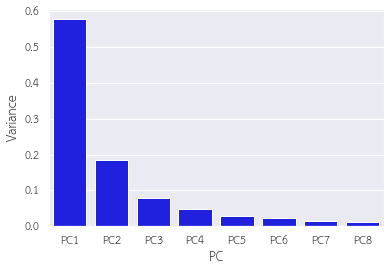

In [83]:
temp_df = pd.DataFrame({'Variance':pca8.explained_variance_ratio_,
                        'PC':['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8']})
sns.barplot(x='PC',y="Variance", data=temp_df, color="blue")

In [84]:
sk_X_train_transformed  = pca8.transform(sk_scaled_X_train)

Text(0, 0.5, 'Second Principal Component')

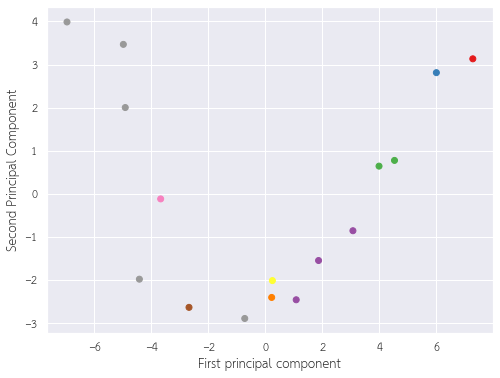

In [85]:
plt.figure(figsize=(8,6))
plt.scatter(sk_X_train_transformed[:,0],sk_X_train_transformed[:,1],c=y_train,cmap='Set1')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [86]:
sk_derived_X_train = pca8.inverse_transform(sk_X_train_transformed)
sk_derived_X_train - sk_scaled_X_train

array([[ 0.2748885 , -0.11415518, -0.22755625, -0.18841887, -0.14339312,
         0.33354903,  0.0533297 , -0.27917103, -0.11790486,  0.27687975,
         0.25576282,  0.00611786,  0.2972179 ,  0.07356708, -0.0243451 ,
        -0.10812546,  0.01498627, -0.22753581,  0.08879641, -0.07869893,
        -0.21177382,  0.20246116, -0.10754053, -0.12974603,  0.07903395,
        -0.15896575,  0.06364508, -0.12219486, -0.1322332 ,  0.08547441],
       [ 0.01128846, -0.10606909,  0.04959474,  0.17940071, -0.05583029,
        -0.12460133, -0.00551891,  0.09441132,  0.08948664, -0.27007183,
        -0.02330812, -0.15549703, -0.39038628, -0.16285342, -0.13547804,
         0.16234507,  0.24964864,  0.13711742,  0.00864275,  0.2180188 ,
        -0.11480508,  0.15293771, -0.063791  ,  0.14282103, -0.11588042,
        -0.09203639,  0.24022576,  0.06502895,  0.06488297,  0.30616796],
       [-0.24894798,  0.13654876,  0.15997012,  0.12423986,  0.00261815,
        -0.14212194, -0.05898237,  0.2353697 , -0

<AxesSubplot:>

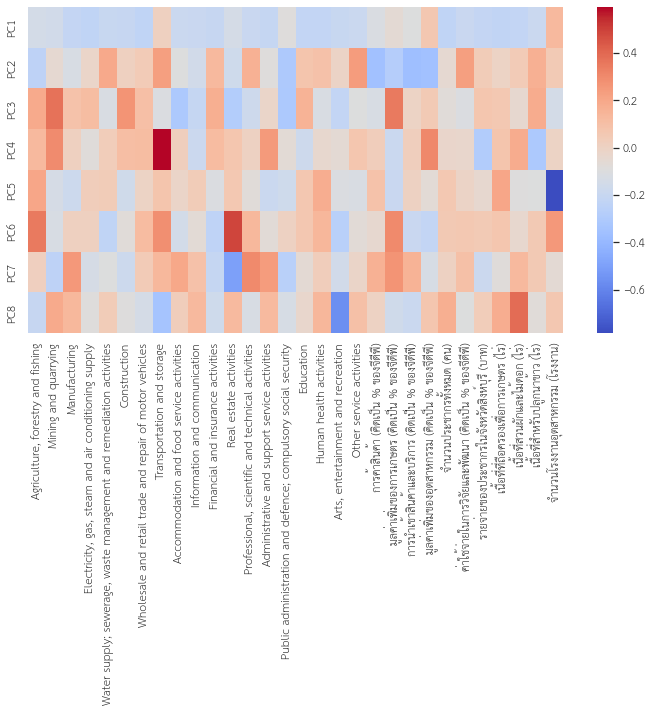

In [87]:
temp_df3 = pd.DataFrame(pca8.components_, columns=X.columns)
temp_df3.rename(index={0: "PC1", 1: "PC2", 2:"PC3", 3:"PC4", 4:"PC5", 5:"PC6", 6:"PC7", 7:"PC8"}, inplace=True)

plt.figure(figsize=(12,6))
sns.heatmap(temp_df3,cmap='coolwarm')

#### components = 9

In [88]:
num_components=9
pca9 = PCA(n_components=num_components)
pca9.fit(sk_scaled_X_train)

PCA(n_components=9)

In [89]:
pca9.explained_variance_

array([18.48372161,  5.91415899,  2.50417552,  1.55859   ,  0.94497378,
        0.73351877,  0.51592155,  0.409701  ,  0.32749158])

In [90]:
pca9.components_

array([[-1.47616209e-01, -1.54158012e-01, -2.17083013e-01,
        -2.32229510e-01, -1.98679197e-01, -2.05986118e-01,
        -2.30595768e-01,  1.09476118e-02, -1.89625941e-01,
        -1.95103437e-01, -2.03542458e-01, -1.41471969e-01,
        -1.95703374e-01, -2.11577843e-01, -8.75595859e-02,
        -2.21370628e-01, -2.19899468e-01, -1.96344283e-01,
        -1.88402030e-01, -1.10833788e-01, -6.16567184e-02,
        -9.61701060e-02,  6.58410954e-02, -2.33220032e-01,
        -1.94951320e-01, -2.16233262e-01, -2.25546806e-01,
        -2.20942277e-01, -1.86339086e-01,  1.31727991e-01],
       [-2.40967349e-01, -5.00876094e-02, -1.21322505e-01,
        -2.03981547e-02,  1.92788557e-01,  1.31607622e-02,
         4.19558143e-02,  2.28888889e-01, -9.80075505e-02,
        -1.58168738e-01,  1.31010345e-01, -1.64307412e-01,
         1.60521363e-01, -8.84155642e-02, -3.06869807e-01,
         7.66851869e-02,  8.98259155e-02, -1.28110399e-02,
         2.43282974e-01, -3.52498380e-01, -2.80911613e-

In [91]:
pca9.explained_variance_ratio_

array([0.5776163 , 0.18481747, 0.07825548, 0.04870594, 0.02953043,
       0.02292246, 0.01612255, 0.01280316, 0.01023411])

In [92]:
np.sum(pca9.explained_variance_ratio_)

0.9810078997651849

<AxesSubplot:xlabel='PC', ylabel='Variance'>

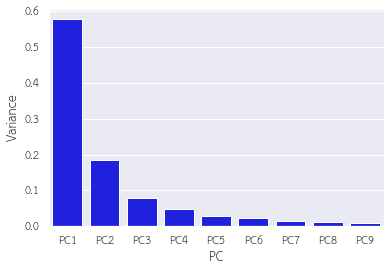

In [93]:
temp_df = pd.DataFrame({'Variance':pca9.explained_variance_ratio_,
                        'PC':['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9']})
sns.barplot(x='PC',y="Variance", data=temp_df, color="blue")

In [94]:
sk_X_train_transformed  = pca9.transform(sk_scaled_X_train)

Text(0, 0.5, 'Second Principal Component')

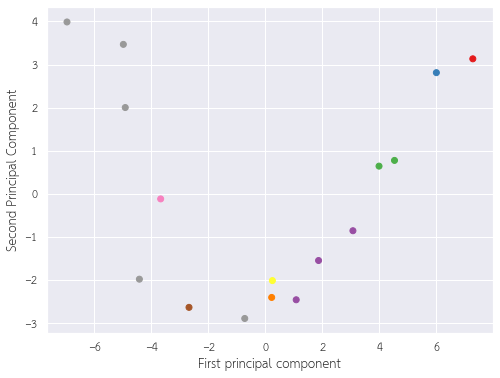

In [95]:
plt.figure(figsize=(8,6))
plt.scatter(sk_X_train_transformed[:,0],sk_X_train_transformed[:,1],c=y_train,cmap='Set1')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [96]:
sk_derived_X_train = pca9.inverse_transform(sk_X_train_transformed)
sk_derived_X_train - sk_scaled_X_train

array([[ 8.71396533e-02,  4.80690375e-02, -1.54727810e-01,
        -1.72122235e-01, -7.68742002e-02,  2.79110047e-01,
        -4.11696564e-03, -8.99174600e-02, -2.37990188e-01,
         2.71108609e-01,  1.60119163e-01, -1.29250512e-02,
         2.51914163e-01,  6.91303450e-02,  1.49525719e-01,
        -1.07224557e-01,  7.45398924e-02, -2.77398376e-01,
         3.65476860e-02,  1.73293995e-02, -1.69112586e-01,
         2.29359769e-01, -1.74662980e-01, -9.68625691e-02,
         8.98680402e-02, -5.95166326e-02, -9.38870857e-02,
        -1.29694385e-01, -4.56141277e-02, -1.23733111e-02],
       [-1.66508160e-02, -8.19281916e-02,  6.04324776e-02,
         1.81825842e-01, -4.59314783e-02, -1.32702503e-01,
        -1.40676631e-02,  1.22574516e-01,  7.16165034e-02,
        -2.70930643e-01, -3.75410397e-02, -1.58330841e-01,
        -3.97128018e-01, -1.63513665e-01, -1.09603982e-01,
         1.62479134e-01,  2.58510934e-01,  1.29697273e-01,
         8.67517662e-04,  2.32308962e-01, -1.08456576e-

<AxesSubplot:>

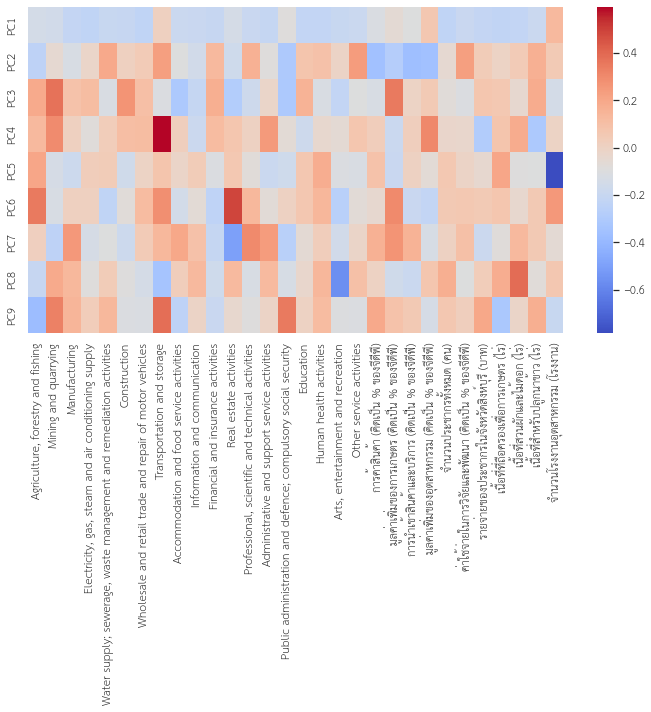

In [97]:
temp_df3 = pd.DataFrame(pca9.components_, columns=X.columns)
temp_df3.rename(index={0: "PC1", 1: "PC2", 2:"PC3", 3:"PC4", 4:"PC5", 5:"PC6", 6:"PC7", 7:"PC8", 8:"PC9"}, inplace=True)

plt.figure(figsize=(12,6))
sns.heatmap(temp_df3,cmap='coolwarm')

#### components = 10

In [98]:
num_components=10
pca10 = PCA(n_components=num_components)
pca10.fit(sk_scaled_X_train)

PCA(n_components=10)

In [99]:
pca10.explained_variance_

array([18.48372161,  5.91415899,  2.50417552,  1.55859   ,  0.94497378,
        0.73351877,  0.51592155,  0.409701  ,  0.32749158,  0.28122583])

In [100]:
pca10.components_

array([[-1.47616209e-01, -1.54158012e-01, -2.17083013e-01,
        -2.32229510e-01, -1.98679197e-01, -2.05986118e-01,
        -2.30595768e-01,  1.09476118e-02, -1.89625941e-01,
        -1.95103437e-01, -2.03542458e-01, -1.41471969e-01,
        -1.95703374e-01, -2.11577843e-01, -8.75595859e-02,
        -2.21370628e-01, -2.19899468e-01, -1.96344283e-01,
        -1.88402030e-01, -1.10833788e-01, -6.16567184e-02,
        -9.61701060e-02,  6.58410954e-02, -2.33220032e-01,
        -1.94951320e-01, -2.16233262e-01, -2.25546806e-01,
        -2.20942277e-01, -1.86339086e-01,  1.31727991e-01],
       [-2.40967349e-01, -5.00876094e-02, -1.21322505e-01,
        -2.03981547e-02,  1.92788557e-01,  1.31607622e-02,
         4.19558143e-02,  2.28888889e-01, -9.80075505e-02,
        -1.58168738e-01,  1.31010345e-01, -1.64307412e-01,
         1.60521363e-01, -8.84155642e-02, -3.06869807e-01,
         7.66851869e-02,  8.98259155e-02, -1.28110399e-02,
         2.43282974e-01, -3.52498380e-01, -2.80911613e-

In [101]:
pca10.explained_variance_ratio_

array([0.5776163 , 0.18481747, 0.07825548, 0.04870594, 0.02953043,
       0.02292246, 0.01612255, 0.01280316, 0.01023411, 0.00878831])

In [102]:
np.sum(pca10.explained_variance_ratio_)

0.9897962068713982

<AxesSubplot:xlabel='PC', ylabel='Variance'>

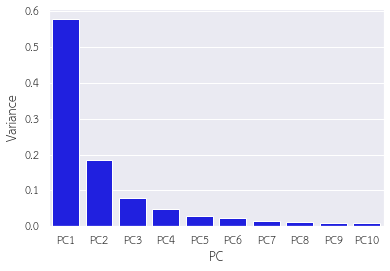

In [103]:
temp_df = pd.DataFrame({'Variance':pca10.explained_variance_ratio_,
                        'PC':['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']})
sns.barplot(x='PC',y="Variance", data=temp_df, color="blue")

In [104]:
sk_X_train_transformed  = pca10.transform(sk_scaled_X_train)

Text(0, 0.5, 'Second Principal Component')

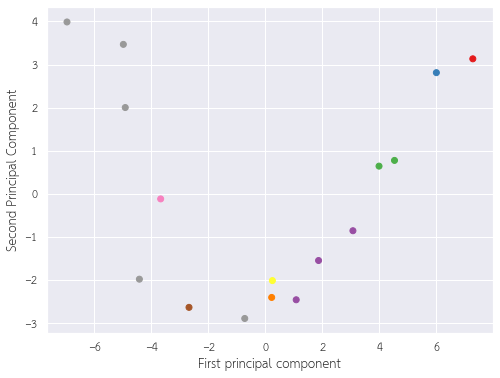

In [105]:
plt.figure(figsize=(8,6))
plt.scatter(sk_X_train_transformed[:,0],sk_X_train_transformed[:,1],c=y_train,cmap='Set1')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [106]:
sk_derived_X_train = pca10.inverse_transform(sk_X_train_transformed)
sk_derived_X_train - sk_scaled_X_train

array([[ 1.01950016e-01,  3.14148762e-02, -1.53881396e-01,
        -1.35649436e-01, -6.25766069e-02,  2.46045862e-01,
        -1.41027377e-03, -6.30101699e-02, -2.22549140e-01,
         1.93402928e-01,  1.55179265e-01, -5.49871502e-02,
         1.45266951e-01,  8.88629083e-03,  1.19930387e-01,
        -7.27205661e-02,  1.42050298e-01, -2.62973138e-01,
         4.79162175e-02,  9.69259618e-02, -2.04583970e-01,
         3.07825757e-01, -2.16776317e-01, -7.57707023e-02,
         6.50547874e-02, -7.19973666e-02, -4.22446020e-02,
        -1.02523727e-01, -2.85258996e-02,  7.76930444e-02],
       [-6.63138646e-02, -2.60824013e-02,  5.75942284e-02,
         5.95229385e-02, -9.38750753e-02, -2.18295791e-02,
        -2.31439140e-02,  3.23472833e-02,  1.98386020e-02,
        -1.03630259e-02, -2.09762586e-02, -1.72855425e-02,
        -3.95118210e-02,  3.85005201e-02, -1.03630358e-02,
         4.67781608e-02,  3.21307595e-02,  8.13256468e-02,
        -3.72541636e-02, -3.45992811e-02,  1.04883208e-

<AxesSubplot:>

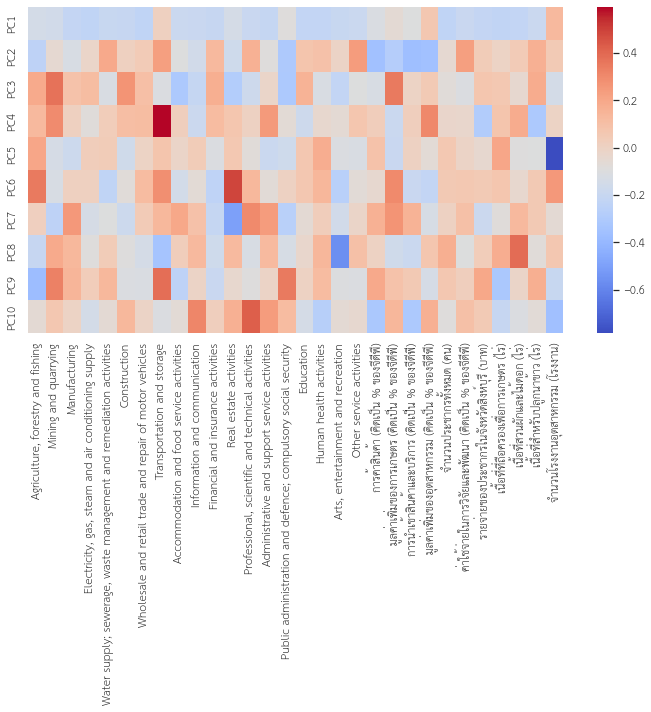

In [107]:
temp_df3 = pd.DataFrame(pca10.components_, columns=X.columns)
temp_df3.rename(index={0: "PC1", 1: "PC2", 2:"PC3", 3:"PC4", 4:"PC5", 5:"PC6", 6:"PC7", 7:"PC8", 8:"PC9", 9:"PC10"}, inplace=True)

plt.figure(figsize=(12,6))
sns.heatmap(temp_df3,cmap='coolwarm')

#### components = 11


In [108]:
num_components=11
pca11 = PCA(n_components=num_components)
pca11.fit(sk_scaled_X_train)

PCA(n_components=11)

In [109]:
pca11.explained_variance_

array([18.48372161,  5.91415899,  2.50417552,  1.55859   ,  0.94497378,
        0.73351877,  0.51592155,  0.409701  ,  0.32749158,  0.28122583,
        0.11419998])

In [110]:
pca11.components_

array([[-1.47616209e-01, -1.54158012e-01, -2.17083013e-01,
        -2.32229510e-01, -1.98679197e-01, -2.05986118e-01,
        -2.30595768e-01,  1.09476118e-02, -1.89625941e-01,
        -1.95103437e-01, -2.03542458e-01, -1.41471969e-01,
        -1.95703374e-01, -2.11577843e-01, -8.75595859e-02,
        -2.21370628e-01, -2.19899468e-01, -1.96344283e-01,
        -1.88402030e-01, -1.10833788e-01, -6.16567184e-02,
        -9.61701060e-02,  6.58410954e-02, -2.33220032e-01,
        -1.94951320e-01, -2.16233262e-01, -2.25546806e-01,
        -2.20942277e-01, -1.86339086e-01,  1.31727991e-01],
       [-2.40967349e-01, -5.00876094e-02, -1.21322505e-01,
        -2.03981547e-02,  1.92788557e-01,  1.31607622e-02,
         4.19558143e-02,  2.28888889e-01, -9.80075505e-02,
        -1.58168738e-01,  1.31010345e-01, -1.64307412e-01,
         1.60521363e-01, -8.84155642e-02, -3.06869807e-01,
         7.66851869e-02,  8.98259155e-02, -1.28110399e-02,
         2.43282974e-01, -3.52498380e-01, -2.80911613e-

In [111]:
pca11.explained_variance_ratio_

array([0.5776163 , 0.18481747, 0.07825548, 0.04870594, 0.02953043,
       0.02292246, 0.01612255, 0.01280316, 0.01023411, 0.00878831,
       0.00356875])

In [112]:
np.sum(pca11.explained_variance_ratio_)

0.9933649562548206

<AxesSubplot:xlabel='PC', ylabel='Variance'>

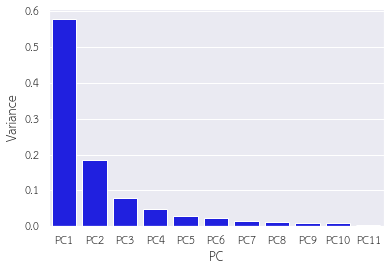

In [113]:
temp_df = pd.DataFrame({'Variance':pca11.explained_variance_ratio_,
                        'PC':['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11']})
sns.barplot(x='PC',y="Variance", data=temp_df, color="blue")

In [114]:
sk_X_train_transformed  = pca11.transform(sk_scaled_X_train)

Text(0, 0.5, 'Second Principal Component')

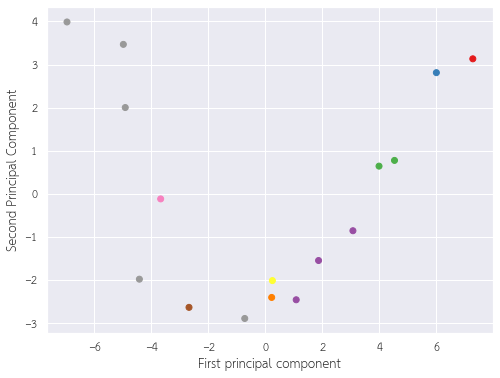

In [115]:
plt.figure(figsize=(8,6))
plt.scatter(sk_X_train_transformed[:,0],sk_X_train_transformed[:,1],c=y_train,cmap='Set1')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [116]:
sk_derived_X_train = pca11.inverse_transform(sk_X_train_transformed)
sk_derived_X_train - sk_scaled_X_train

array([[ 8.56780451e-02,  1.27644010e-01, -6.06981271e-02,
        -8.20755908e-02,  6.58733868e-02,  1.31871394e-02,
         6.45549626e-03, -3.17935389e-02,  9.41149352e-02,
         1.94184613e-02,  9.21027427e-03,  1.66808830e-02,
         3.76426442e-02, -8.24834974e-02, -2.21037627e-03,
        -6.20525860e-02, -4.73551217e-02, -7.45112238e-02,
         1.73274532e-02,  3.24883094e-02, -1.00168072e-02,
         9.27829690e-02, -1.23084547e-01, -9.43854005e-02,
         5.18735940e-02,  4.75491215e-02, -4.28211467e-02,
         5.00003678e-03, -3.08079644e-02,  1.44436372e-02],
       [-6.46483063e-02, -3.59321753e-02,  4.80562215e-02,
         5.40392533e-02, -1.07022896e-01,  2.00525869e-03,
        -2.39490346e-02,  2.91520268e-02, -1.25743426e-02,
         7.44558996e-03, -6.03523690e-03, -2.46213035e-02,
        -2.84956654e-02,  4.78529036e-02,  2.13898794e-03,
         4.56862130e-02,  5.15178256e-02,  6.20351556e-02,
        -3.41231740e-02, -2.80036038e-02, -9.42708849e-

<AxesSubplot:>

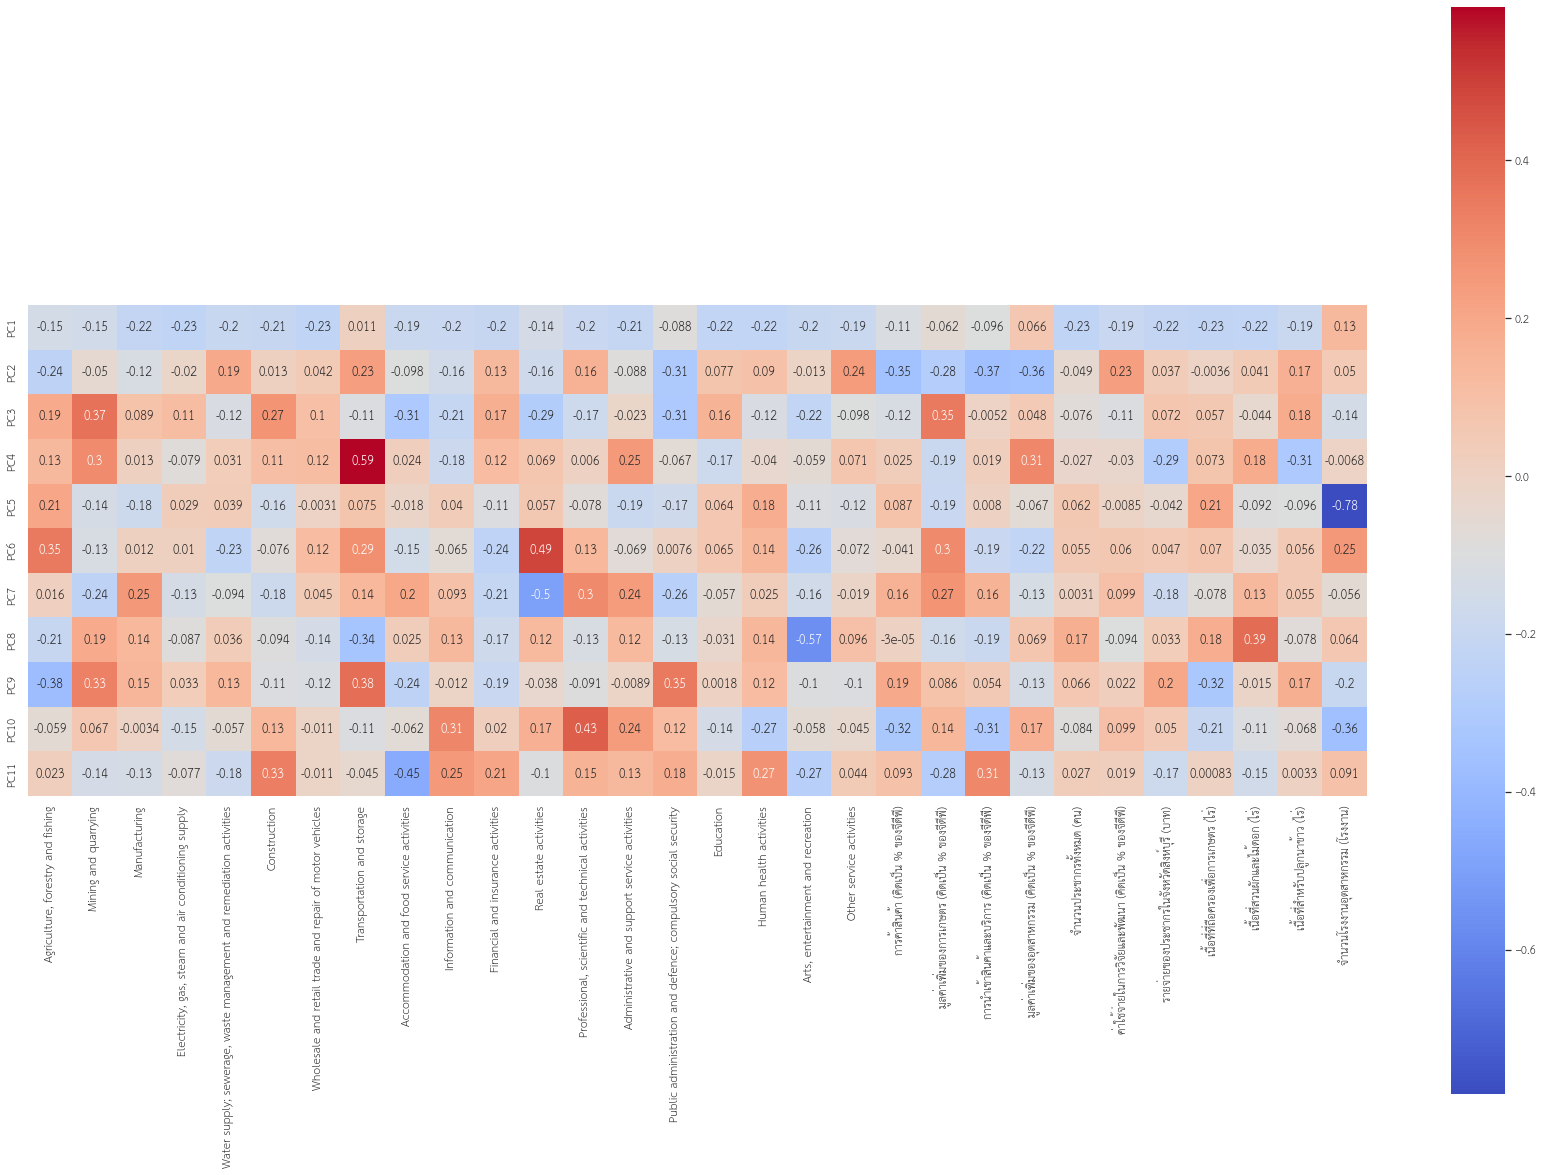

In [117]:
temp_df3 = pd.DataFrame(pca11.components_, columns=X.columns)
temp_df3.rename(index={0: "PC1", 1: "PC2", 2:"PC3", 3:"PC4", 4:"PC5", 5:"PC6", 6:"PC7", 7:"PC8", 8:"PC9", 9:"PC10", 10:"PC11"}, inplace=True)

plt.figure(figsize=(30,20))

sns.heatmap(temp_df3,cmap='coolwarm',
            annot=True,            
            square=True,   
            linecolor=(0,0,0))

In [118]:
temp_df3

,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply; sewerage, waste management and remediation activities",Construction,Wholesale and retail trade and repair of motor vehicles,Transportation and storage,Accommodation and food service activities,Information and communication,...,มูลค่าเพิ่มของการเกษตร (คิดเป็น % ของจีดีพี),การนำเข้าสินค้าและบริการ (คิดเป็น % ของจีดีพี),มูลค่าเพิ่มของอุตสาหกรรม (คิดเป็น % ของจีดีพี),จำนวนประชากรทั้งหมด (คน),ค่าใช้จ่ายในการวิจัยและพัฒนา (คิดเป็น % ของจีดีพี),รายจ่ายของประชากรในจังหวัดสิงห์บุรี (บาท),เนื้อที่ที่ถือครองเพื่อการเกษตร (ไร่),เนื้อที่สวนผักและไม้ดอก (ไร่),เนื้อที่สำหรับปลูกนาข้าว (ไร่),จำนวนโรงงานอุตสาหกรรม (โรงงาน)
PC1,-0.147616,-0.154158,-0.217083,-0.232230,-0.198679,-0.205986,-0.230596,0.010948,-0.189626,-0.195103,...,-0.061657,-0.096170,0.065841,-0.233220,-0.194951,-0.216233,-0.225547,-0.220942,-0.186339,0.131728
PC2,-0.240967,-0.050088,-0.121323,-0.020398,0.192789,0.013161,0.041956,0.228889,-0.098008,-0.158169,...,-0.280912,-0.365191,-0.357534,-0.048521,0.230756,0.037301,-0.003568,0.041245,0.165493,0.050052
PC3,0.189945,0.372972,0.088652,0.111435,-0.116280,0.267083,0.102794,-0.106805,-0.312076,-0.209940,...,0.348768,-0.005152,0.048331,-0.075854,-0.108009,0.071547,0.056624,-0.044234,0.182650,-0.144328
PC4,0.127362,0.296535,0.012575,-0.079466,0.030785,0.105983,0.115063,0.594516,0.024079,-0.181354,...,-0.187856,0.019087,0.308422,-0.026553,-0.030119,-0.290998,0.073136,0.183726,-0.311054,-0.006801
PC5,0.206365,-0.136301,-0.176802,0.029236,0.038604,-0.162841,-0.003087,0.075344,-0.018249,0.039728,...,-0.192682,0.007980,-0.066634,0.061760,-0.008458,-0.041685,0.206177,-0.091998,-0.096282,-0.782595
PC6,0.347081,-0.125280,0.012310,0.010237,-0.231129,-0.075880,0.120168,0.287640,-0.152574,-0.065231,...,0.303136,-0.194782,-0.219664,0.054818,0.060209,0.046575,0.070097,-0.035375,0.055548,0.250468
PC7,0.016456,-0.243399,0.252226,-0.133142,-0.094192,-0.175992,0.044850,0.135771,0.196509,0.093425,...,0.269557,0.157578,-0.129821,0.003117,0.099320,-0.180670,-0.077974,0.130992,0.054985,-0.056476
PC8,-0.206186,0.186027,0.136303,-0.086788,0.036397,-0.093618,-0.138763,-0.337737,0.024543,0.128123,...,-0.160932,-0.187517,0.068709,0.169605,-0.094229,0.033074,0.178826,0.388247,-0.077590,0.063532
PC9,-0.377023,0.325766,0.146249,0.032726,0.133578,-0.109320,-0.115360,0.380045,-0.241146,-0.011589,...,0.085669,0.054016,-0.134790,0.066034,0.021756,0.199706,-0.316344,-0.015060,0.173942,-0.196490
PC10,-0.059269,0.066648,-0.003387,-0.145960,-0.057217,0.132319,-0.010832,-0.107680,-0.061793,0.310969,...,0.141953,-0.314012,0.168533,-0.084407,0.099300,0.049947,-0.206667,-0.108734,-0.068385,-0.360436


In [119]:
res = {}
for row1 in temp_df3.index:
    rows = []
    for col1 in temp_df3.columns:
        #print(temp_df3[col1][row1])
        if abs(temp_df3[col1][row1]) >= 0.5: rows.append(col1)
    res[row1] = rows
res

{'PC1': [],
 'PC2': [],
 'PC3': [],
 'PC4': ['Transportation and storage'],
 'PC5': ['จำนวนโรงงานอุตสาหกรรม (โรงงาน)'],
 'PC6': [],
 'PC7': [],
 'PC8': ['Arts, entertainment and recreation'],
 'PC9': [],
 'PC10': [],
 'PC11': []}